In [1]:
import numpy as np
import pandas as pd

#### Import data, separator is '\t'

In [2]:
df_train = pd.read_csv('data/zhengqi_train.txt',sep='\t')
df_test = pd.read_csv('data/zhengqi_test.txt',sep='\t')

## Data overview

In [3]:
print(df_train.shape)
print(df_test.shape)

(2888, 39)
(1925, 38)


#### Check first 5 rows
* total 39 columns, 1 target with 38 features (V0 - V37)

In [4]:
df_train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


* test only has 37 features from V0 - V37

In [5]:
df_test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


* No missing data in training dataset (imputation or removing data no needed)
* all data's Dtype are float64 (Type Conversion no needed)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

* same as training dataset, no missing data
* Dtype are all float64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

## Visualize data distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [9]:
#take feature list (remove target)
feature_list = list(df_train.columns)[:-1]
print(feature_list)

['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']


#### KDE (kernel density estimation)
* check the shape of train and test datasets.
* we can see ['V5','V9','V11','V14','V17', 'V19','V20','V21','V22','V27']
 * The distributions of these features in the train and test sets are very different, so here I am going to take them out. Otherwise our model may fail or generalize poorly

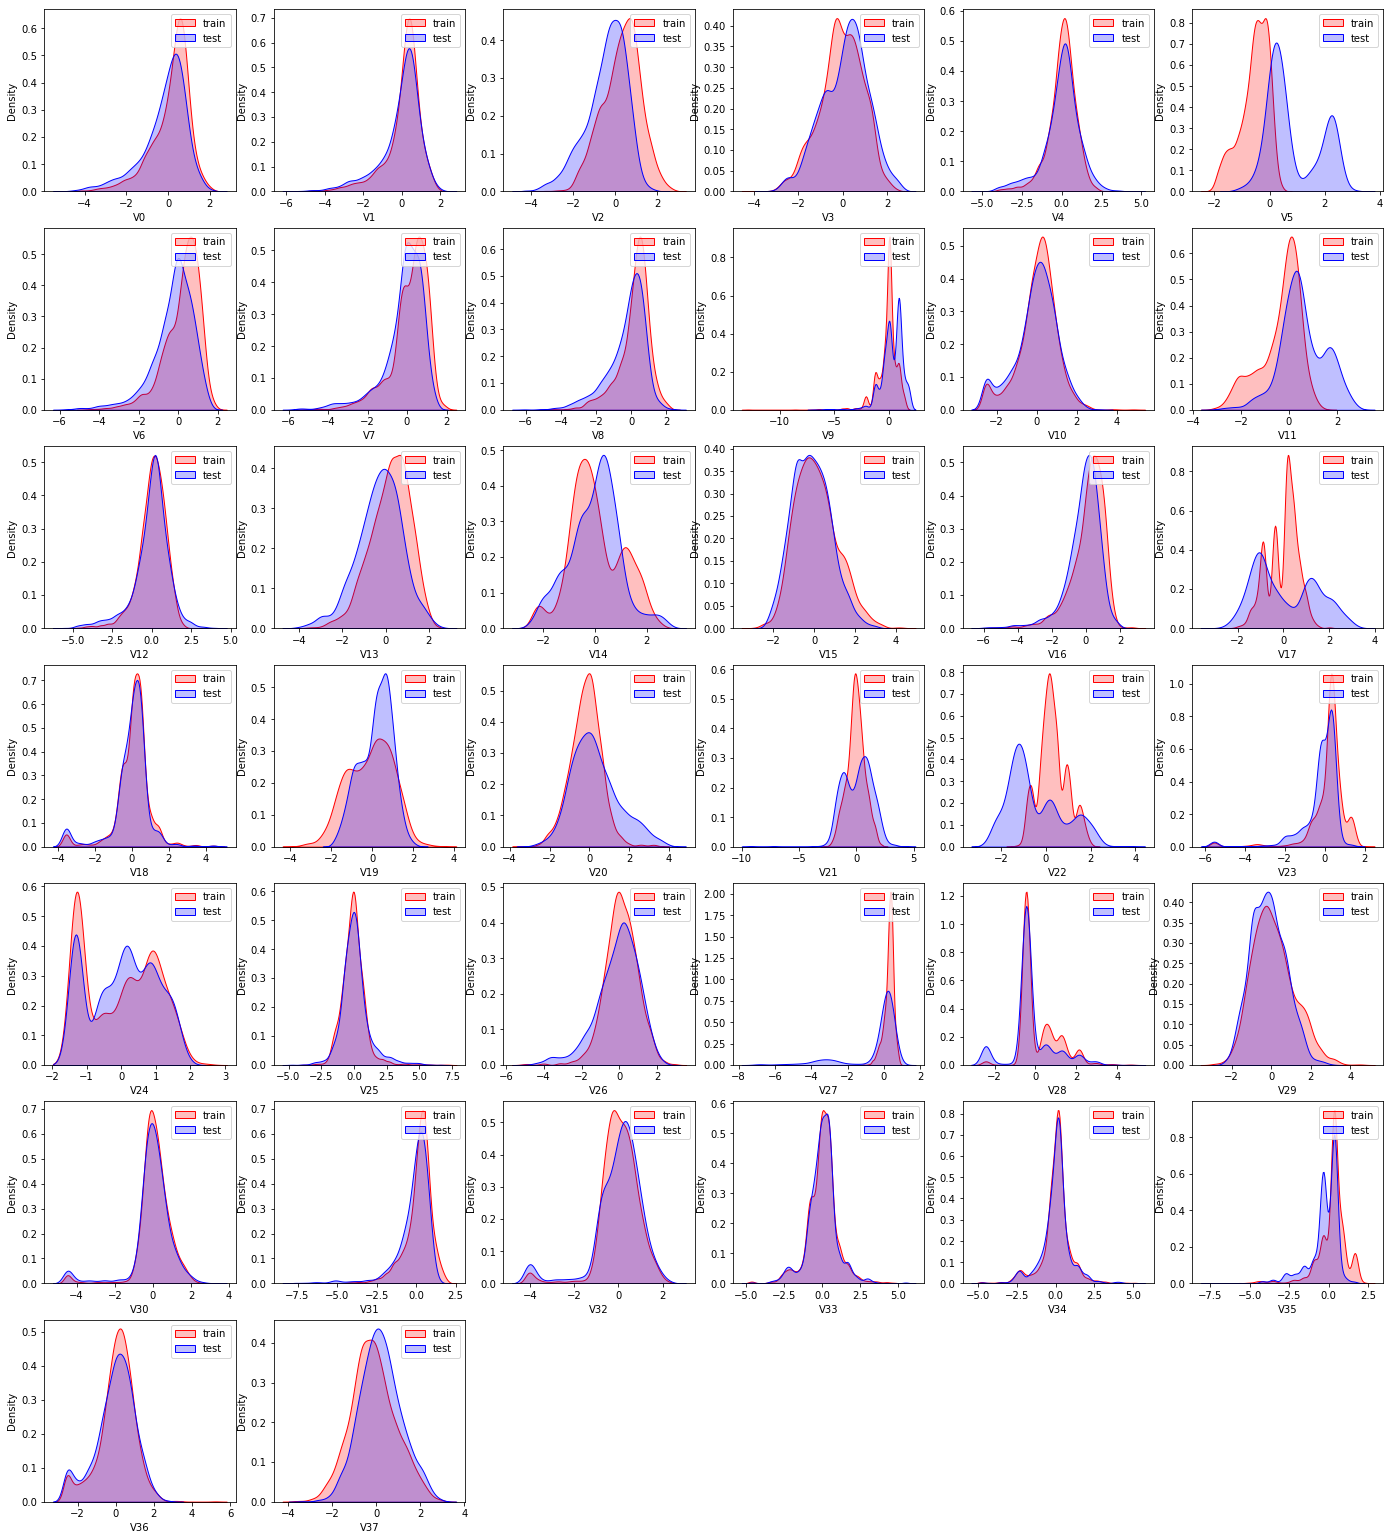

In [10]:
index = 1
plt.figure(figsize=(24,4*38))
for i in feature_list:
    ax = plt.subplot(38, 6, index)
    ax = sns.kdeplot(df_train[i], color='Red', shade=True)
    ax = sns.kdeplot(df_test[i], color='Blue', shade = True)
    ax.set_xlabel(i)
    ax = ax.legend(['train','test'])
    index += 1

plt.show()

#### Dissimilar features

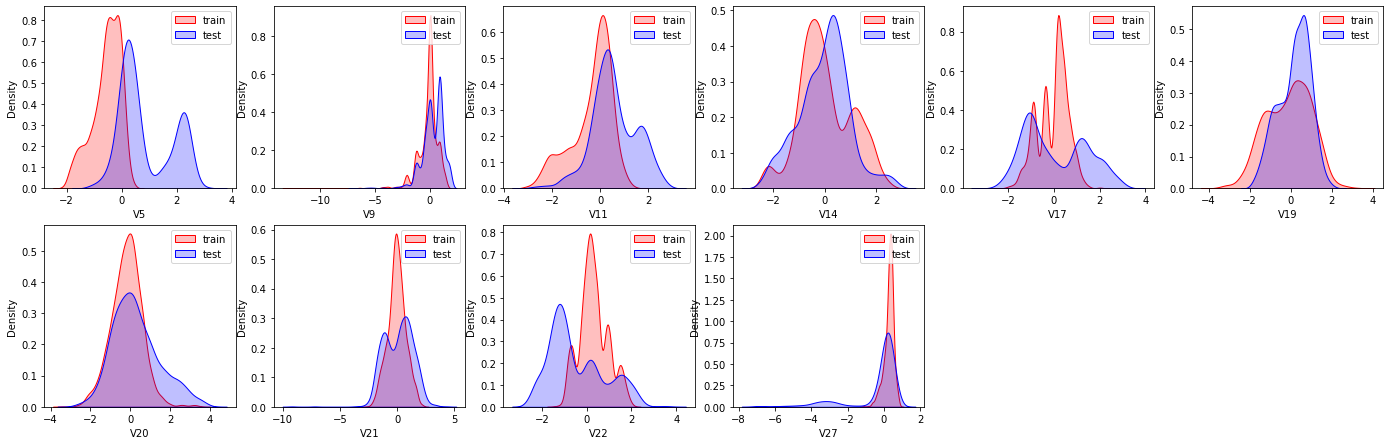

In [11]:
outlier_feature = ['V5','V9','V11','V14','V17', 'V19','V20','V21','V22','V27']
index = 1
plt.figure(figsize=(24,4*38))
for i in outlier_feature:
    ax = plt.subplot(38, 6, index)
    ax = sns.kdeplot(df_train[i], color='Red', shade=True)
    ax = sns.kdeplot(df_test[i], color='Blue', shade = True)
    ax.set_xlabel(i)
    ax = ax.legend(['train','test'])
    index += 1

plt.show()

In [12]:
#update df_train, df_test and feature_list
new_featureList = [x for x in feature_list if x not in outlier_feature]
new_featureList.append('target')
df_train = df_train[new_featureList]
new_featureList.remove('target')
df_test = df_test[new_featureList]

In [13]:
print(df_train.columns)
print(df_test.columns)
print(len(new_featureList))

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13',
       'V15', 'V16', 'V18', 'V23', 'V24', 'V25', 'V26', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'target'],
      dtype='object')
Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13',
       'V15', 'V16', 'V18', 'V23', 'V24', 'V25', 'V26', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37'],
      dtype='object')
28


## correlation coefficient
### want to check the linear regression relationship of all variables to the target
* using (PCC) pearson correlation coefficient 
* |value| > 0.7 (strong correlation)
 * 0.5 ~ 0.7 (median correlation)
 * 0.3 ~ 0.5 (low correlation)
 * < 0.3 (no correlation)

In [14]:
df_train.corr()

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.298443,0.751830,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.310120,0.656186,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.346006,0.059941,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,0.321262,0.306397,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,0.141129,0.927685,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.415660,-0.087312,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.310982,-0.036791,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.419703,0.420557,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,1.000000,0.140462,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767
V12,0.751830,0.656186,0.059941,0.306397,0.927685,-0.087312,-0.036791,0.420557,0.140462,1.000000,...,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.081963,0.112150,-0.054827,0.594189


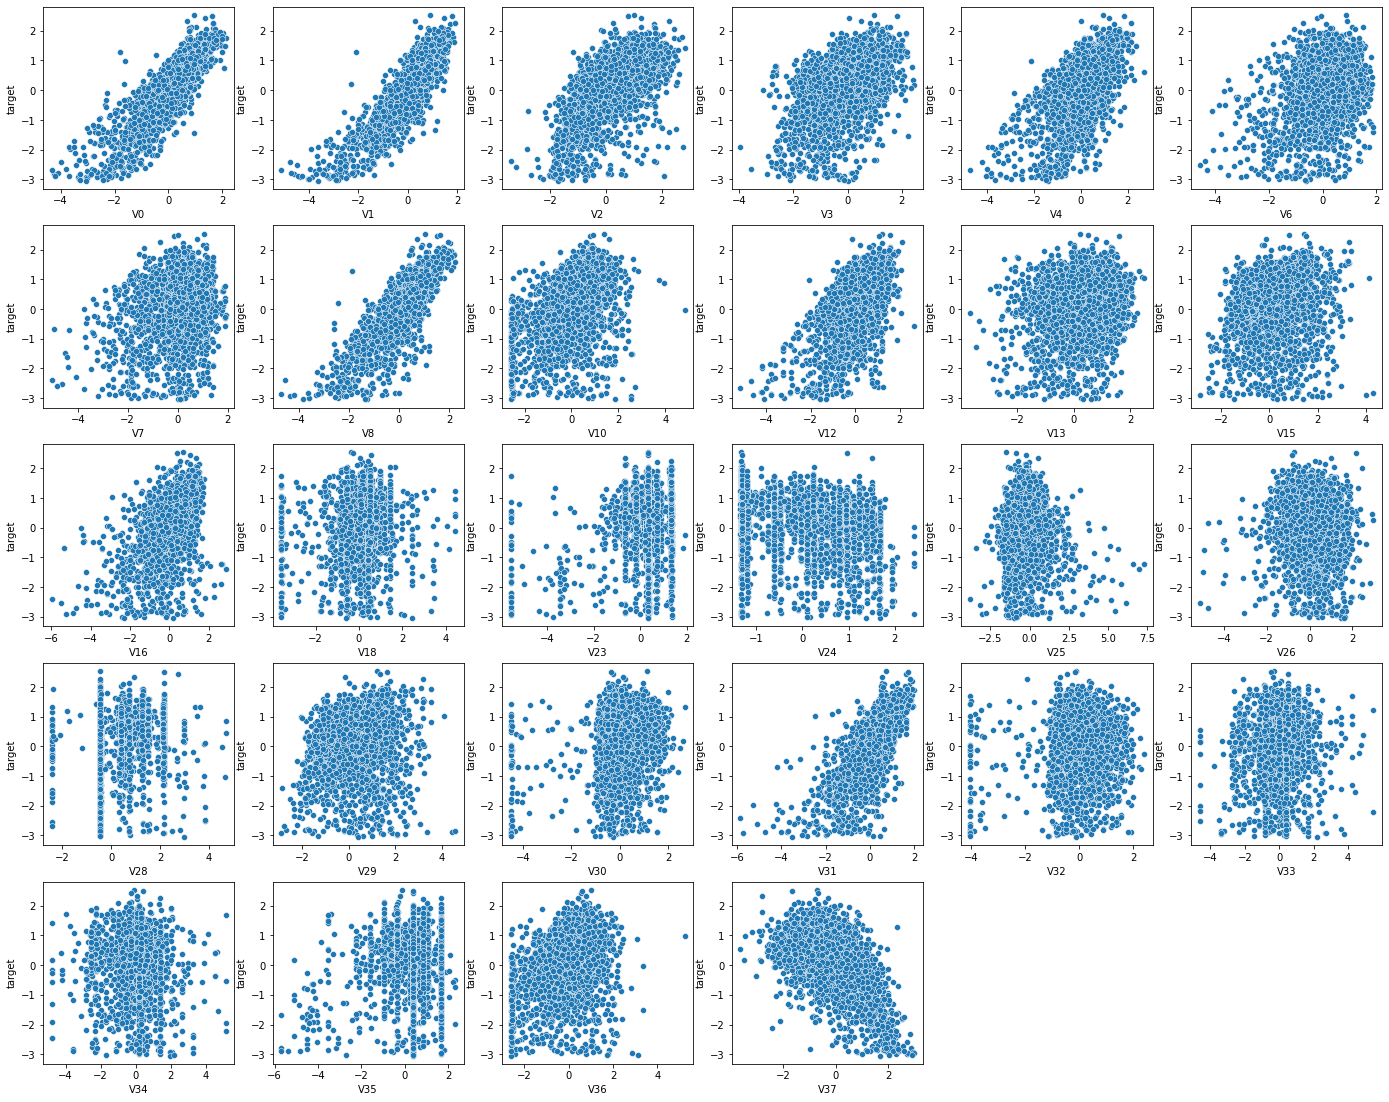

In [15]:
#scatter plot
index = 1
plt.figure(figsize=(24,4*28))
for i in new_featureList:
    ax = plt.subplot(28, 6, index)
    ax = sns.scatterplot(df_train[i],df_train['target'])
    index += 1
plt.show()

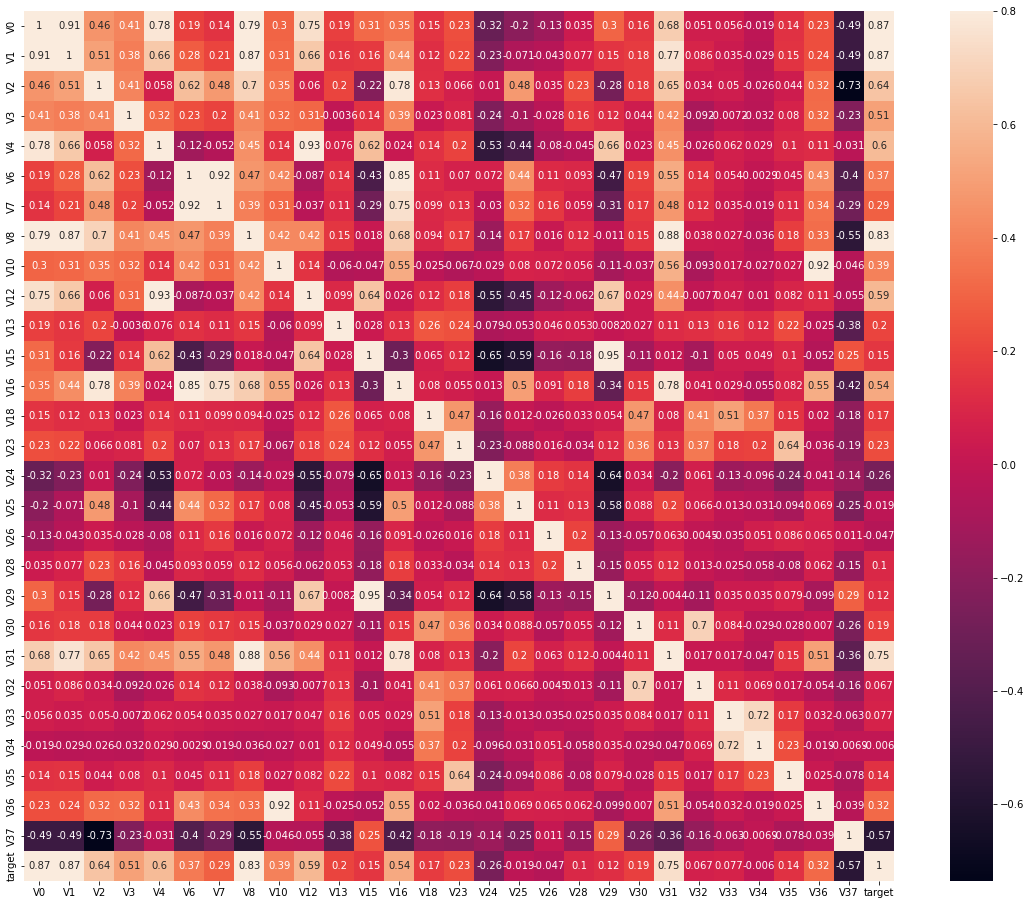

In [16]:
#heatmap
ax = plt.figure(figsize=(20,16))
ax = sns.heatmap(df_train.corr(), vmax=.8,square=True, annot=True)

#### Here I want to keep all features have |PCC| > 0.5 as strong correlation.

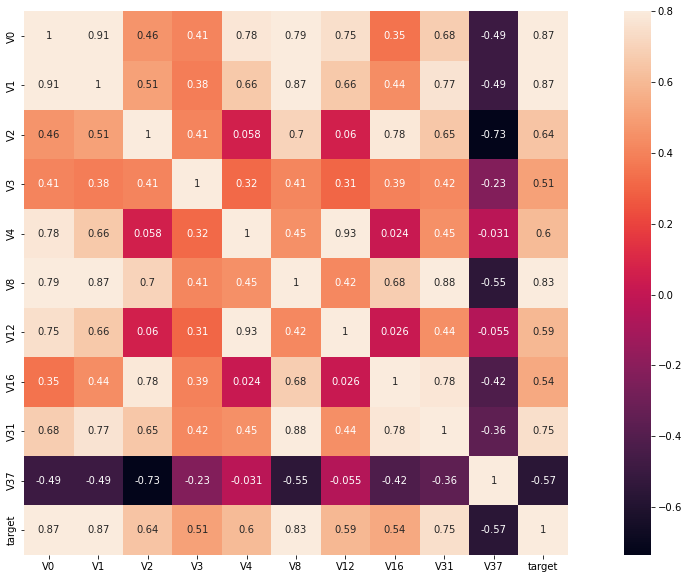

In [17]:
train_corr = df_train.corr()
valid_train_corr = train_corr.index[abs(train_corr['target']) > 0.5]

ax = plt.figure(figsize=(20,10))
ax = sns.heatmap(df_train[valid_train_corr].corr(), vmax=.8,square=True, annot=True)

In [18]:
#update df_train, df_test and feature_list
final_feature_list = list(df_train[valid_train_corr].columns)
df_train = df_train[final_feature_list]
final_feature_list.remove('target')
df_test = df_test[final_feature_list]

In [19]:
print(df_train.columns)
print(df_test.columns)
print(len(final_feature_list))

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V8', 'V12', 'V16', 'V31', 'V37',
       'target'],
      dtype='object')
Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V8', 'V12', 'V16', 'V31', 'V37'], dtype='object')
10


## Normal distribution check

In [20]:
from scipy import stats

#### From the skewness for each feature, we can see most of them are skewed a bit to the left

In [21]:
for i in final_feature_list:
    skew = stats.skew(df_train[i])
    print(f'{i}: {skew}')

V0: -1.274557400506133
V1: -1.6362082255126171
V2: -0.2998841141419553
V3: -0.3525158668876084
V4: -1.0225882649648517
V8: -1.2510117368817457
V12: -1.1495057890140747
V16: -1.524795002807165
V31: -1.6784701924519203
V37: 0.1471279719834817


#### use kurtosis to check if its close enough to normal

In [22]:
for i in final_feature_list:
    kurtosis = stats.kurtosis(df_train[i])
    print(f'{i}: {kurtosis}')

V0: 2.2081464879424457
V1: 3.7069397335011525
V2: -0.09001662175344105
V3: -0.07853226221268583
V4: 2.5857888253446397
V8: 2.477237645942078
V12: 2.9927019454896415
V16: 3.909445710111876
V31: 5.341126690479877
V37: -0.01609912770402344


#### Since value of skewness in range (-2,2) and value of kurtosis in (-7,7). The distribution of data is acceptable
* maybe try Box cox transformation to normalize the data in the future
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

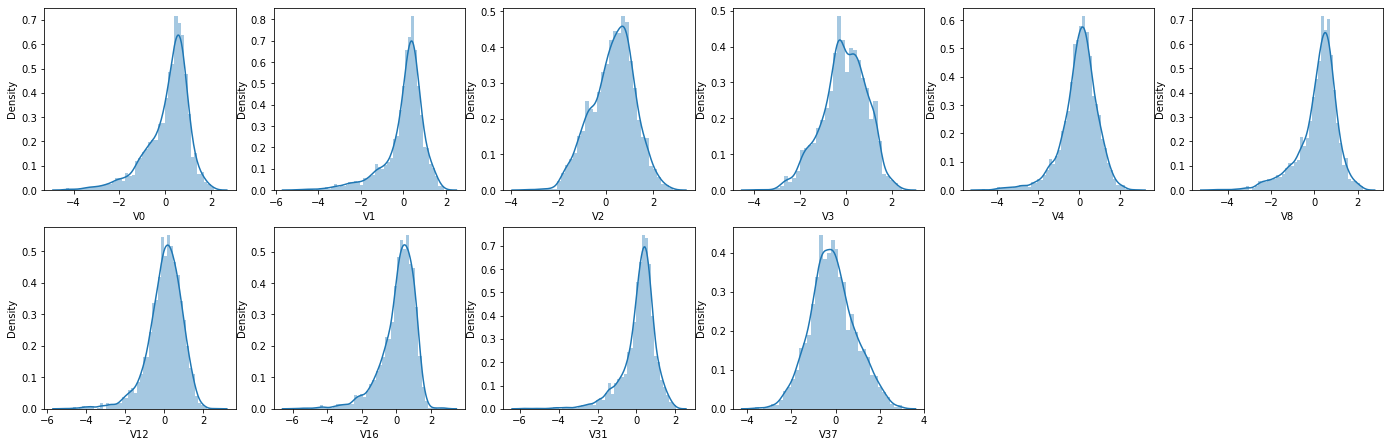

In [23]:
#distribution plot
index = 1
plt.figure(figsize=(24,4*28))
for i in final_feature_list:
    ax = plt.subplot(28, 6, index)
    ax = sns.distplot(df_train[i])
    index += 1
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

### Split the data 
* df_train_value: 75%, 
* df_vali_value: 25%, 
* df_train_target: 75%, 
* df_vali_target: 25%

In [32]:
from sklearn.model_selection import train_test_split
df_train_value, df_vali_value, df_train_target, df_vali_target=train_test_split(new_train, new_test, test_size=0.25,random_state=1)

In [33]:
df_train_value=df_train_value.reset_index(drop=True)
df_vali_value=df_vali_value.reset_index(drop=True)
df_train_target=df_train_target.reset_index(drop=True)
df_vali_target=df_vali_target.reset_index(drop=True)

In [34]:
df_train_value=np.array(df_train_value)
df_vali_value=np.array(df_vali_value)
df_train_target=np.array(df_train_target)
df_vali_target=np.array(df_vali_target)

### XGboost

In [63]:
import xgboost as xgb
model_xgb=xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:linear')
model_xgb.fit(df_train_value,df_train_target)

[17:46:36] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:46:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=True, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
predict_xgb=model_xgb.predict(df_vali_value)

In [65]:
score = mean_squared_error(df_vali_target,predict_xgb)
print("score: " + str(score))

score: 0.12655858869359915


#### Select one hundred groups to view the prediction effort

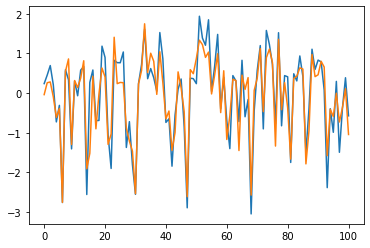

In [66]:
plt.plot(df_vali_target[0:101])
plt.plot(predict_xgb[0:101])

### Random Forests

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=200, random_state=0)

In [39]:
model_RF.fit(df_train_value, df_train_target)
predict_RF=model_RF.predict(df_vali_value)

In [45]:
score = mean_squared_error(df_vali_target,predict_RF)
print("score: " + str(score))

score: 0.11545324109757621


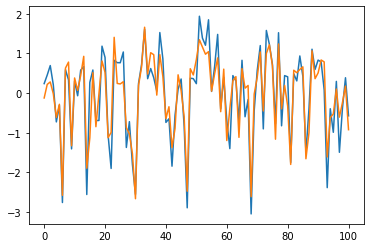

In [43]:
plt.plot(df_vali_target[0:101])
plt.plot(predict_RF[0:101])

### Bayesian Linear Regression

In [47]:
from sklearn import linear_model
model_BR=linear_model.BayesianRidge()
model_BR.fit(df_train_value,df_train_target)
predict_BR=model_BR.predict(df_vali_value)

In [48]:
score = mean_squared_error(df_vali_target,predict_BR)
print("score: " + str(score))

score: 0.11940836401629862


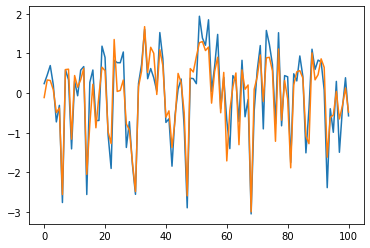

In [49]:
plt.plot(df_vali_target[0:101])
plt.plot(predict_BR[0:101])

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(df_train_value,df_train_target)
predict_LR=model_LR.predict(df_vali_value)

In [51]:
score = mean_squared_error(df_vali_target,predict_LR)
print("score: " + str(score))

score: 0.11949407221385226


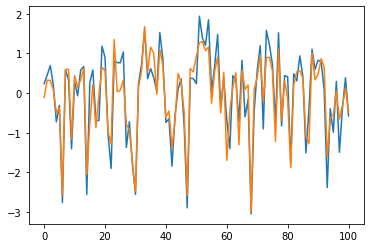

In [52]:
plt.plot(df_vali_target[0:101])
plt.plot(predict_LR[0:101])

### final testing set

In [53]:
df_test.head()

,V0,V1,V2,V3,V4,V8,V12,V16,V31,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.244,0.346,-0.089,-0.042,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.127,0.465,-0.093,0.176,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,-0.227,0.173,-0.061,0.199,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.010,-0.038,-0.134,0.137,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.155,-0.063,-0.075,0.370,-0.497


In [54]:
df_test = np.array(df_test)

In [58]:
predict_test = model_RF.predict(df_test)
print(predict_test)

[ 0.243295  0.197865 -0.104745 ... -2.60149  -2.631545 -2.545635]


In [60]:
test_final = pd.read_csv('data/zhengqi_test.txt',sep='\t')
test_final['target'] = predict_test

In [61]:
test_final.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388,0.243295
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104,0.197865
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569,-0.104745
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391,0.134080
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497,0.291495
